## Graph

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import time
import timeit
import datetime
import http.client
import requests
import json

#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from heapq import *
from sklearn.linear_model import LinearRegression

In [7]:
corr_mat = pd.read_csv("Data/Corr_Mat/2012-01-03.csv", index_col=0)
corr_mat

,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACGL,ACHC,...,XOM,XPO,XRAY,XYL,Y,YUM,ZBH,ZBRA,ZG,ZION
A,1.000000,0.850289,0.473590,0.662476,0.744241,0.682554,0.748424,0.732606,0.636345,0.436394,...,0.810795,0.515362,0.866544,0.836897,0.593325,0.789369,0.828089,0.792351,0.444682,0.775548
AA,0.850289,1.000000,0.402455,0.636491,0.704683,0.656852,0.750036,0.732465,0.609271,0.359837,...,0.858883,0.468912,0.860315,0.803154,0.602682,0.718831,0.816482,0.772823,0.469305,0.804726
AAL,0.473590,0.402455,1.000000,0.476614,0.383267,0.313391,0.339984,0.343650,0.405781,0.303906,...,0.318058,0.293282,0.493161,0.393310,0.424004,0.389943,0.461619,0.331770,0.347349,0.477057
AAP,0.662476,0.636491,0.476614,1.000000,0.664428,0.510734,0.534033,0.608144,0.452484,0.381930,...,0.642483,0.551955,0.719230,0.710401,0.440668,0.690886,0.653289,0.615800,0.401131,0.650033
AAPL,0.744241,0.704683,0.383267,0.664428,1.000000,0.545006,0.622398,0.605437,0.492783,0.383362,...,0.640428,0.523857,0.745278,0.703029,0.513747,0.644802,0.701099,0.644872,0.382780,0.714824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.789369,0.718831,0.389943,0.690886,0.644802,0.585363,0.612064,0.696632,0.536143,0.300421,...,0.720505,0.520265,0.739338,0.730547,0.500721,1.000000,0.718131,0.690017,0.414819,0.727233
ZBH,0.828089,0.816482,0.461619,0.653289,0.701099,0.652285,0.737298,0.778389,0.583582,0.474640,...,0.825622,0.522784,0.847557,0.766190,0.584485,0.718131,1.000000,0.763184,0.527856,0.723423
ZBRA,0.792351,0.772823,0.331770,0.615800,0.644872,0.674706,0.676529,0.697096,0.623881,0.369488,...,0.781808,0.476193,0.808782,0.743292,0.606962,0.690017,0.763184,1.000000,0.436885,0.689320
ZG,0.444682,0.469305,0.347349,0.401131,0.382780,0.357837,0.416414,0.434513,0.324215,0.293900,...,0.403613,0.229800,0.477973,0.414879,0.374246,0.414819,0.527856,0.436885,1.000000,0.495791


In [8]:
def MST(G):
    # sort edges weight in descending order
    h = []
    for u,v,d in G.edges(data=True):
        heappush(h, (d['weight'],u,v))
    heapsort = [heappop(h) for i in range(len(h))]
    heapsort.reverse()

    # kruskal MST algorithm
    def find_subtree(parent, i):
        # i represents index of nodes
        if parent[i] == i:
            return i
        return find_subtree(parent, parent[i])

    res = nx.Graph()
    parent = [j for j in range(len(G.nodes))]
    subtree_sizes = [0]*len(G.nodes)
    i = 0
    e = 0 # number of edges in MST

    while e<(len(G.nodes)-1):
        w, u, v = heapsort[i]
        i += 1
        u_index = list(G.nodes).index(u)
        v_index = list(G.nodes).index(v)
        x = find_subtree(parent, u_index)
        y = find_subtree(parent, v_index)
        # if u and v belongs to different subtree
        if x!=y:
            e += 1
            res.add_edge(u, v, weight = w)
            # connect two trees
            parent[y] = x
    return res

In [9]:
G0 = nx.from_pandas_adjacency(corr_mat-np.diag(np.diag(corr_mat)))

In [10]:
G0_MST = MST(G0)

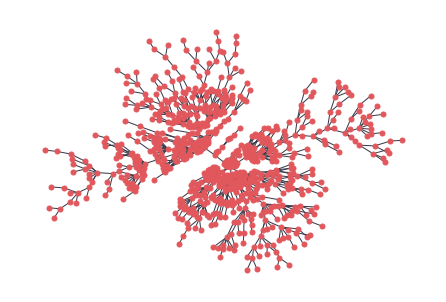

In [11]:
nx.draw(G0_MST, with_labels=False, node_size=25, node_color="#e1575c", edge_color='#363847',  pos=nx.kamada_kawai_layout(G0_MST))